# Exercise 31

### Regularized Least Squares

### a)

Fit a sixth degree polynomial to the data in the file ex_a.csv using the least squares method.
State the resulting coefficients and plot the fitted polynomial and data.

In [17]:
import numpy as np
import pandas as pd
from numpy.linalg import pinv
from numpy.linalg import inv
import matplotlib.pyplot as plt
data = pd.read_csv('ex_a.csv')
x = data['x'].values
y = data[ 'y_0'].values
x_x = np.array(x)
def pn(x,n):
    return x**n
def p6(x,params):
    return params[6]*pn(x,6)+params[5]*pn(x,5)+params[4]*pn(x,4)+params[3]*pn(x,3)+params[2]*pn(x,2)+params[1]*pn(x,1)+params[0]

#calculate designmatrix(vector)
A = np.array([pn(x,0),pn(x,1),pn(x,2),pn(x,3),pn(x,4),pn(x,5),pn(x,6)]).T
AT = A.T
a = ((pinv(AT@A))@AT)@y
print("vec_a = ",a)
print(A)

vec_a =  [ 2.50619301e-01 -5.78875078e-01  7.03766187e-01 -3.37061360e-01
  7.69041588e-02 -8.41973820e-03  3.55422548e-04]
[[1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02]
 [1.00000000e+00 1.50000000e+00 2.25000000e+00 3.37500000e+00
  5.06250000e+00 7.59375000e+00 1.13906250e+01]
 [1.00000000e+00 2.50000000e+00 6.25000000e+00 1.56250000e+01
  3.90625000e+01 9.76562500e+01 2.44140625e+02]
 [1.00000000e+00 3.50000000e+00 1.22500000e+01 4.28750000e+01
  1.50062500e+02 5.25218750e+02 1.83826562e+03]
 [1.00000000e+00 4.50000000e+00 2.02500000e+01 9.11250000e+01
  4.10062500e+02 1.84528125e+03 8.30376562e+03]
 [1.00000000e+00 5.50000000e+00 3.02500000e+01 1.66375000e+02
  9.15062500e+02 5.03284375e+03 2.76806406e+04]
 [1.00000000e+00 6.50000000e+00 4.22500000e+01 2.74625000e+02
  1.78506250e+03 1.16029062e+04 7.54188906e+04]
 [1.00000000e+00 7.50000000e+00 5.62500000e+01 4.21875000e+02
  3.16406250e+03 2.37304688e+04 1.77978516e+

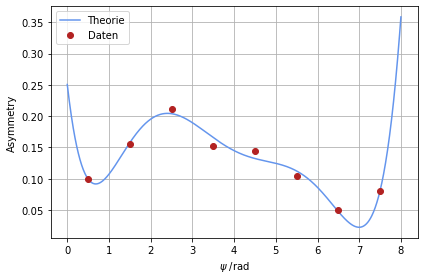

In [2]:
k = np.linspace(0,8,1000)
plt.plot(k,p6(k,a),label = "Theorie",color = "cornflowerblue")
plt.plot(x,y,marker="o",linewidth = 0,label = "Daten",color = "firebrick")

plt.legend()
plt.grid()
plt.xlabel("$\psi \,\,/$rad")
plt.ylabel("Asymmetry")
plt.tight_layout()

### b)

Fit a sixth degree polynomial to the data in the file ex_a.csv using the least squares method
and additionally use the regularization via the second derivative $(\Gamma =\sqrt{\lambda}CA$. For the regularization
strength use $𝜆 ∈ (0.1, 0.3, 0.7, 3, 10)$. State the resulting coefficients and plot the fitted
polynomial and the data.

In [3]:
C = np.matrix([[-1,1,0,0,0,0,0,0],[1,-2,1,0,0,0,0,0],[0,1,-2,1,0,0,0,0],[0,0,1,-2,1,0,0,0],[0,0,0,1,-2,1,0,0],[0,0,0,0,1,-2,1,0]
             ,[0,0,0,0,0,1,-2,1],[0,0,0,0,0,0,1,-1]],dtype = "float64")

lambdas = np.array([0.1,0.3,0.7,3,10])
a_regg = np.ones((len(lambdas),len(x)-1))
def a_reg(lambda_):
    return pinv(np.add((AT@A),(lambda_*(C@A).T@(C@A))))@AT@y
for i in range(len(lambdas)):
    a_regg[i] = a_reg(lambdas[i])
    print("a_reg zu lambd =",i,"ist",a_reg(i),"\n")
#print(pinv(np.add((AT@A),(0.1*(C@A).T@(C@A))))@AT@y)


a_reg zu lambd = 0 ist [[ 2.50619301e-01 -5.78875078e-01  7.03766187e-01 -3.37061360e-01
   7.69041588e-02 -8.41973820e-03  3.55422548e-04]] 

a_reg zu lambd = 1 ist [[ 1.42210195e-01 -6.59540037e-02  9.42121806e-02 -4.09525900e-02
   7.98718397e-03 -7.58454145e-04  2.87955442e-05]] 

a_reg zu lambd = 2 ist [[ 1.44275721e-01 -3.65867145e-02  5.34392738e-02 -2.25003069e-02
   4.12403416e-03 -3.68583817e-04  1.34033722e-05]] 

a_reg zu lambd = 3 ist [[ 1.46435270e-01 -2.53253801e-02  3.71732482e-02 -1.54747228e-02
   2.73169691e-03 -2.34332183e-04  8.27195452e-06]] 

a_reg zu lambd = 4 ist [[ 1.47970215e-01 -1.93561467e-02  2.83290913e-02 -1.17740930e-02
   2.02637781e-03 -1.68498942e-04  5.80965796e-06]] 



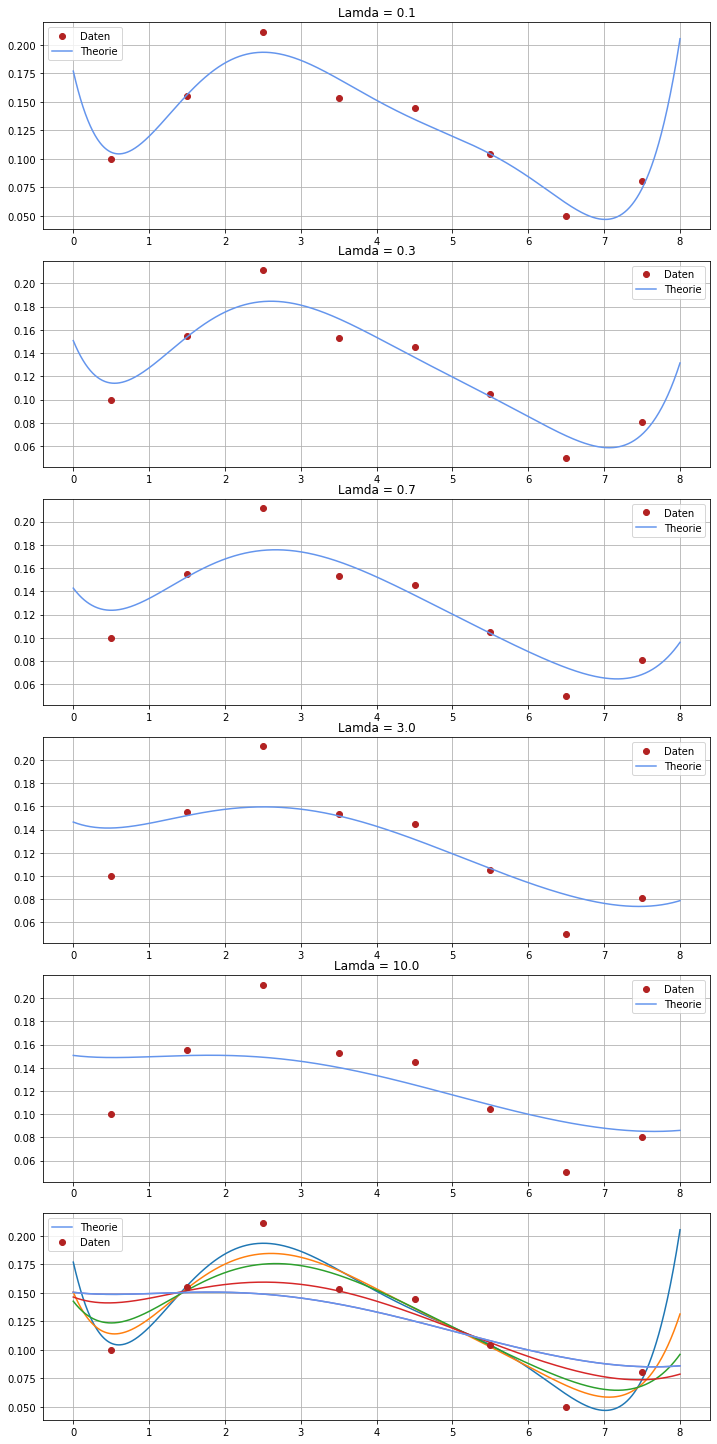

In [4]:
#plots for b)
fig,ax = plt.subplots(6,figsize=(10,20))

fig.tight_layout()

for i in range(5):
    ax[i].plot(x,y,marker="o",linewidth = 0,label = "Daten",color = "firebrick")
    ax[i].plot(k,p6(k,a_regg[i]),label = "Theorie",color = "cornflowerblue")
    ax[i].legend()
    ax[i].grid()
    ax[i].set_title(f'Lamda = {lambdas[i]}')
    ax[5].plot(k,p6(k,a_regg[i]))
 

ax[5].plot(k,p6(k,a_regg[i]),label = "Theorie",color = "cornflowerblue")
ax[5].plot(x,y,marker="o",linewidth = 0,label = "Daten",color = "firebrick")
ax[5].legend()
ax[5].grid()

    





These plots show, that in this case smaller $\lambda$ values give better fits than bigger values.

### c)


Your colleague makes the effort to produce $50$ new measurements of the spectrum.

Fit a sixth degree polynomial to the mean values of the data from the file ex_c.csv using the
least squares method. Weight the calculated means with the uncertainty of the mean. Use these
weights when fitting. Plot the fitted polynomial and the averaged data.

In [5]:
data_c = pd.read_csv('ex_c.csv')
x_c = data['x'].values
#mean values
y_c = data_c.iloc[:,1:].mean(axis=1).values
weights = data_c.iloc[:,1:].std(axis=1).values 
#design matrix
A_c = np.array([pn(x_c,0),pn(x_c,1),pn(x_c,2),pn(x_c,3),pn(x_c,4),pn(x_c,5),pn(x_c,6)]).T

#weight matrix
W = inv(np.diag(weights**2))
#without weights
a_c = ((inv(A_c.T@A_c))@A_c.T)@y_c
#with weights
a_w = (inv(A_c.T@W@A_c))@A_c.T@W@y

print("Parameters with weights are a =",a_w,"\n")
print("Parameters without weights are a =",a_c)

Parameters with weights are a = [ 2.05620518e-01 -4.21182004e-01  5.32077153e-01 -2.55460474e-01
  5.80657046e-02 -6.34252942e-03  2.67811182e-04] 

Parameters without weights are a = [ 1.26244797e-01 -9.53347504e-03  7.27981164e-02 -4.10586243e-02
  8.89661137e-03 -8.77219082e-04  3.31728755e-05]


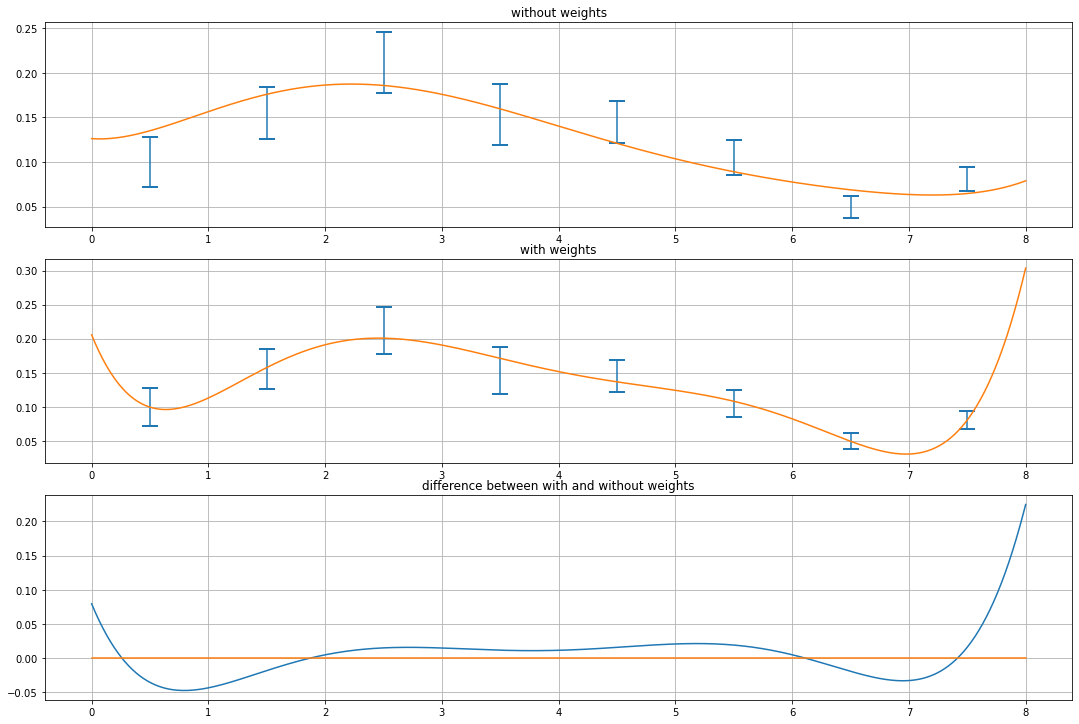

In [15]:
#plots
fig, ax = plt.subplots(3, figsize=(15,10))

fig.tight_layout()

ax[0].set_title('without weights')
ax[0].errorbar(x,y,yerr=weights, capsize=8, lw=0, elinewidth=1.5, capthick=2)
ax[0].plot(k, p6(k,a_c))
ax[0].grid()

ax[1].set_title('with weights')
ax[1].errorbar(x,y,yerr=weights, capsize=8, lw=0, elinewidth=1.5, capthick=2)
ax[1].plot(k, p6(k,a_w))
ax[1].grid()

ax[2].set_title('difference between with and without weights')
ax[2].plot(k, p6(k,a_w)-p6(k,a_c))
ax[2].plot(k,k*0)
ax[2].grid()

_